# Time Series

## Learning outcomes
* Standard definitions of time series, time series analysis, and time series forecasting
* The important components to consider in time series data
* Some ways to visualize time series data
* Lag Features

## Definition

* In time series we have an explicit order dependence between observations: a time dimension
* The time dimension is both a constraint and a structure that provides a source of additional information

```
Time #1, observation
Time #2, observation
Time #3, observation
```


## Time Series Nomenclature

* Current time $t$, the observation at the current time is `obs(t)`
* Previos time is $(t-1)$
* The time before that is $(t-2)$
* ...
* The next time is $(t+1)$

To summarize:
* $t - n$: A prior or lag time
* $t$: a current time and point of reference
* $t+n$: a future or forecast time

### Daily Female Births Dataset

We will use [this dataset](https://www.kaggle.com/datasets/dougcresswell/daily-total-female-births-in-california-1959])

https://www.kaggle.com/datasets/paulbrabban/daily-minimum-temperatures-in-melbourne

In [45]:
import pandas as pd

series = pd.read_csv("data/daily-minimum-temperatures-in-me.csv", parse_dates=True)
type(series)

pandas.core.frame.DataFrame

In [46]:
series.dtypes

Date                                                              object
Daily minimum temperatures in Melbourne, Australia, 1981-1990    float64
dtype: object

In [25]:
series.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


<Axes: >

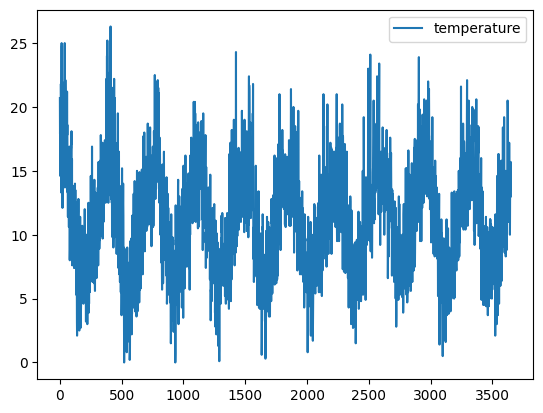

In [38]:
series.plot()

In [39]:
series.size

7300

In [40]:
series.shape

(3650, 2)

In [41]:
series.describe()

,temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [30]:
series.isna().sum()

Date                                                             0
Daily minimum temperatures in Melbourne, Australia, 1981-1990    0
dtype: int64

## Feature Engineering for Time Series

Question for you: what is the goal of feature engineering?
The goal of feature engineering is to provide strong and ideally simple relationships between new input features and the output feature for the supervised learning

* Date Time Features: these are components of the time step itself for each observation.
* Lag Features: these are values at prior time steps.
* Window Features: these are a summary of values over a fixed window of prior time steps.

In [49]:
series = pd.read_csv("data/daily-minimum-temperatures-in-me.csv")
series.columns = ['date', 'temperature']
series['date'] = pd.to_datetime(series['date'])

In [73]:
dataframe = pd.DataFrame()
dataframe['month'] = series['date'].dt.month
dataframe['day'] = series['date'].dt.day
dataframe['temperature'] = series['temperature']

KeyError: 'date'

In [53]:
dataframe

,month,day,temperature
0,1,1,20.7
1,1,2,17.9
2,1,3,18.8
3,1,4,14.6
4,1,5,15.8
...,...,...,...
3645,12,27,14.0
3646,12,28,13.6
3647,12,29,13.5
3648,12,30,15.7


Using just the month and day information alone to predict temperature is not sophisticated and will likely result in a poor model.
You may enumerate all the properties of a time-stamp and consider what might be useful for your problem, such as:
* Minutes elapsed for the day.
* Hour of day
* Business hours or not
* Weekend or not
* Season of the year
* Business quarter of the year
* Daylight savings or not
* Public holiday or not
* Leap year or not

### Lag Features

* Classical way that time series forecasting problems are transformed into supervised learning problems.
* The simplest approach is to predict the value at the next time $(t+1)$ given the value at the current time ($t$)
* Pandas provides the `shift()` function to created shifted pr çag featires frp, a to,e seroes dataset

In [55]:
series.head()

,date,temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


We want to have the date field as an index

In [56]:
series.set_index('date', inplace=True)

In [57]:
series

,temperature
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [59]:
series.values

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [61]:
temps = pd.DataFrame(series.values)
dataframe = pd.concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.head()

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [62]:
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
dataframe.head()


,t-2,t-1,t,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8


We can create a function to do the lagged features in the same dataframe:

In [63]:
def create_lag_df(df, lag, cols):
    return df.assign(
        **{f"{col}-{n}": df[col].shift(n) for n in range(1, lag + 1) for col in cols}
    )

In [65]:
series.columns

Index(['temperature'], dtype='object')

In [66]:
series_lag5 = create_lag_df(series, 5, ['temperature'])

In [67]:
series_lag5.head(5)

,temperature,temperature-1,temperature-2,temperature-3,temperature-4,temperature-5
date,,,,,,
1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN
1981-01-02,17.9,20.7,NaN,NaN,NaN,NaN
1981-01-03,18.8,17.9,20.7,NaN,NaN,NaN
1981-01-04,14.6,18.8,17.9,20.7,NaN,NaN
1981-01-05,15.8,14.6,18.8,17.9,20.7,NaN


## Describing x Predicting

### Time Series Analysis
* Uses classical statistical
* Develop models that best capture or describe and observed time series in order to understand the underlying causes
* Making assuptions about the form of the data and decomposing the time series into constitution components
* Primary objective: develop mathematical models that provide plausible descriptions from sample data

### Time Series Forecasting
* Predcitions about the future = extrapolation (classical statistical)
* Modern fields: time series forecasting
* Taking models to fit on historical data and using them to predict future observation
* Descriptive models can use data from the future, they only seek to best describe data
* For forecasting the future is completely unavailable

## Visualizations

<Axes: xlabel='date'>

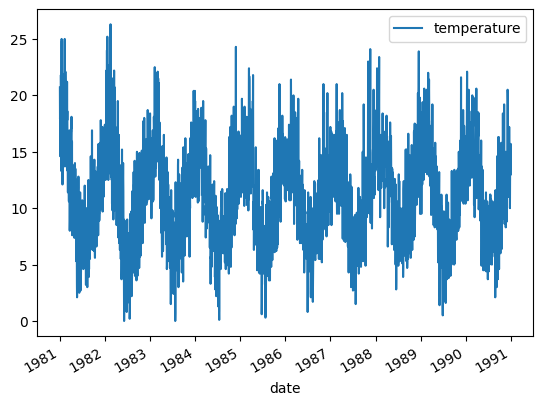

In [68]:
series.plot()

The line plot is quite dense.
We can change the style of the line.

<Axes: xlabel='date'>

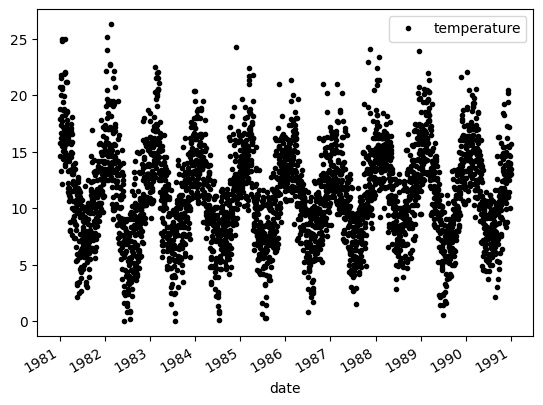

In [69]:
series.plot(style='k.')

Is the temperature changing over time?
We have 10 years information

How could we verify if we can see any changes over the years?

### Groupby

* It can be helpful to compare line plots for the same interval
    * day-to-day
    * month-to-month
    * year-to-year

The Daily Temperatures dataset spans 10 years
We can group data by year and create a line plot for each year for direct comparison

In [94]:
groups = series.groupby(pd.Grouper(freq='YE'))
years = pd.DataFrame()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

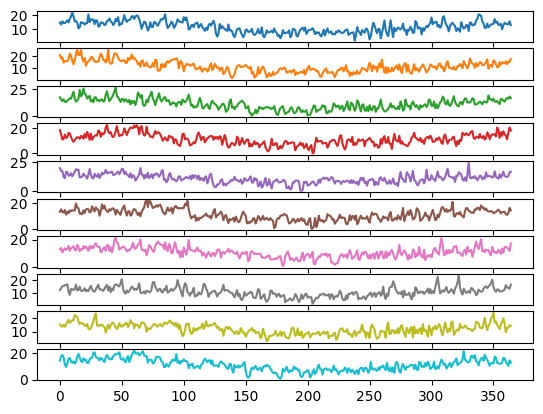

In [109]:
import numpy as np
for name, group in groups:
    years[name.year] = np.ravel(group.values.tolist())

years.plot(subplots=True, legend=False)

Not very informative...

Let's try different kinds of visualizations

### Histograms and Density Plots

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

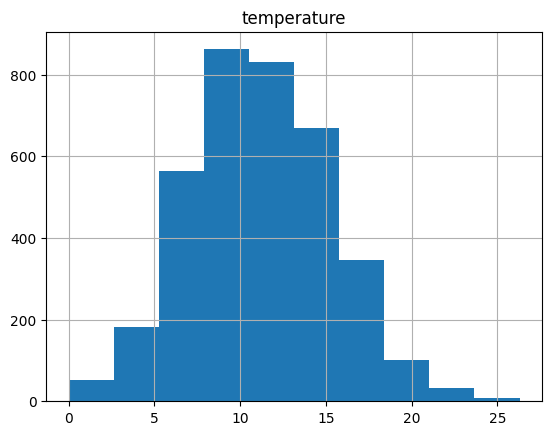

In [112]:
series.hist()

<Axes: ylabel='Density'>

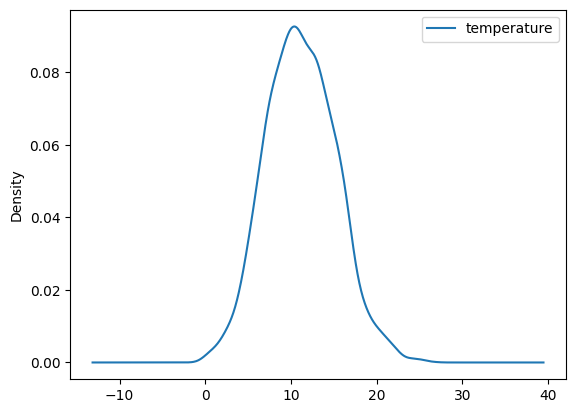

In [113]:
series.plot(kind='kde')

### Boxplots

<Axes: >

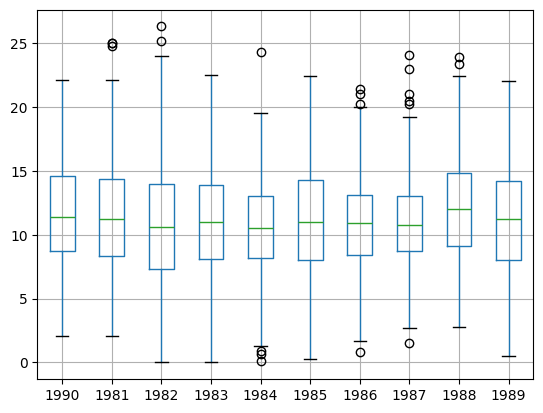

In [114]:
years.boxplot()

What if we want to see the distribution of values across months within a year...

<Axes: >

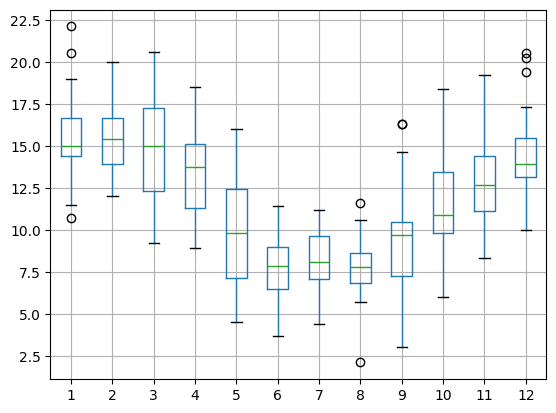

In [120]:
one_year = series.loc[series.index>='1990']
groups = one_year.groupby(pd.Grouper(freq='ME'))
months =pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()

### Heat maps
* A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color --> heatmap

In [124]:
years.T

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
1990,14.8,13.3,15.6,14.5,14.3,15.3,16.4,14.8,17.4,18.8,...,13.2,13.9,10.0,12.9,14.6,14.0,13.6,13.5,15.7,13.0
1981,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,...,15.0,12.8,15.0,14.2,14.0,15.5,13.3,15.6,15.2,17.4
1982,17.0,15.0,13.5,15.2,13.0,12.5,14.1,14.8,16.2,15.8,...,10.8,15.6,15.3,13.9,13.0,15.3,16.3,15.8,17.7,16.3
1983,18.4,15.0,10.9,11.4,14.8,12.1,12.8,16.2,15.5,13.0,...,12.2,16.7,13.8,17.5,15.0,13.9,11.1,16.1,20.4,18.0
1984,19.5,17.1,17.1,12.0,11.0,16.3,16.1,13.0,13.4,15.2,...,14.2,11.4,13.7,16.5,12.8,12.2,12.0,12.6,16.0,16.4
1985,13.3,15.2,13.1,12.7,14.6,11.0,13.2,12.2,14.4,13.7,...,13.7,12.0,13.1,13.2,13.3,11.5,10.8,12.0,16.3,14.4
1986,12.9,13.8,10.6,12.6,13.7,12.6,13.1,15.4,11.9,13.8,...,11.6,9.7,13.4,10.5,14.7,14.6,14.2,13.2,11.7,17.2
1987,12.3,13.8,15.3,15.6,16.2,16.3,16.8,11.0,8.5,13.2,...,11.2,11.4,11.2,12.1,12.7,16.2,14.2,14.3,13.3,16.7
1988,15.3,14.3,13.5,15.0,13.6,15.2,17.0,18.7,16.5,17.4,...,11.9,15.2,17.3,19.8,15.8,9.5,12.9,12.9,14.8,14.1
1989,14.3,17.4,18.5,16.8,11.5,9.5,12.2,15.7,16.3,13.6,...,11.8,12.0,12.7,16.4,16.0,13.3,11.7,10.4,14.4,12.7


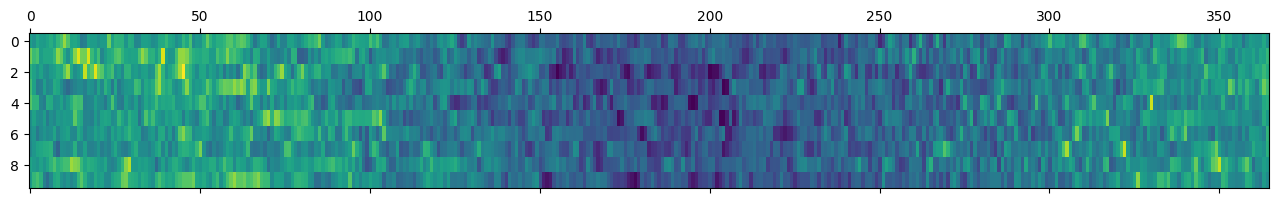

In [123]:
import matplotlib.pyplot as plt
plt.matshow(years.T, interpolation=None, aspect='auto')

### Lag Scatter Plots

* Time series modeling assumes a relationship between an observation and the previous observation
* Previous observations are called lags
* We can observe the relationship between each observation and a lag of that observation using a scatter plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

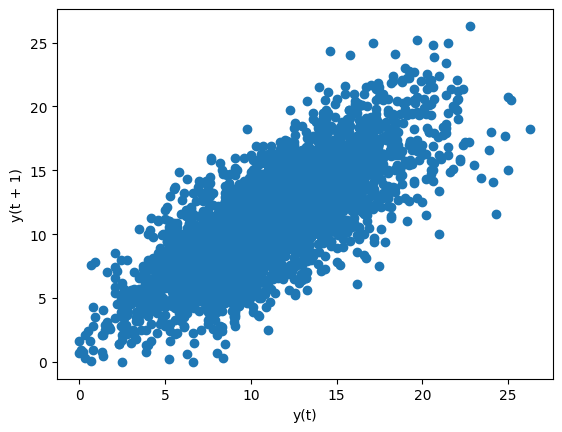

In [125]:
pd.plotting.lag_plot(series)

What other lag scatterplots would be intersting?

## Practice

* Explore [this dataset](https://www.kaggle.com/datasets/bulentsiyah/for-simple-exercises-time-series-forecasting/data)
* Create some visualizations
* Do you see any interesting patterns?